# Regularized Models in Action

Scikit-learn provides a wide variety of machine learning models that provide different mechanisms to control model complexity and implement different strategies to find the optimal model coefficients.

In this section we will apply scikit-learn to reduce model complexity by:
- manually dropping variables
- PCA and PLS regression
- Ridge and LASSO

In this section, we will not optimize the hyperparameters, only select a single hyperparameter value.
In the [next section](leakage.ipynb) we will demonstrate how selecting the hyperparameters can result in double-dipping, a.k.a. feature leakage.
In the [next chapter](../5_hyperparameter_optimization/index.md), we will see how feature leakage during hyperparameter-tuning can be prevented by so-called nested cross-validation.


## Manual feature selection

Here we do something we have already done [before](../2_linear_models/practice_linear_models.ipynb): we simply don't use all available features in order to reduce model complexity. While in the [theory section](theory_regularization.ipynb) we discussed that selection could be done by selecting best features based on an arbitrary statistical test for the association between the features and the target variable, here we don't apply this technique, as it is especially vulnerable to feature leakage, a common source of mistake we will discuss in the [next section](leakage.ipynb).

Below, we simply show that using only the 10 first features (instead of all 68) already results in a large improvement of cross-validated predictive performance (in this dataset at this sample size).

In [16]:
#imports
!pip install scikit-learn > /dev/null 2>&1
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

MAE =  9.079447432962283 years


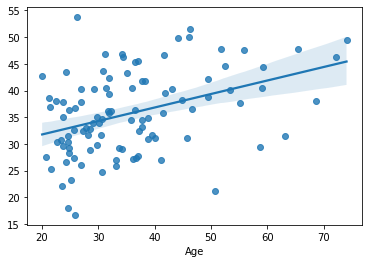

In [17]:
#load data
df = pd.read_csv("https://raw.githubusercontent.com/pni-lab/predmod_lecture/master/ex_data/IXI/ixi.csv").loc[:100, :]
# cross validation
cv = KFold(5) # 5 folds, 20 participants in each fold

# names of the columns to be used
target = 'Age'
features = df.columns[2:12]

cv_predictions = cross_val_predict(estimator=LinearRegression(), y=df[target], X=df[features], cv=KFold(5))
sns.regplot(x=df[target], y=cv_predictions)
print('MAE = ', mean_absolute_error(y_true=df[target], y_pred=cv_predictions), 'years')

:::{admonition} Exercise 4.1
Compare the above results to [the case](../3_cross_validation/cv.ipynb) where we use all available features.
:::

:::{admonition} Exercise 4.2
Try out different number of features. How does the cross-validated performance change?
:::

## Dimensionality Reduction: PCA and PLS

MAE =  8.658108451519261 years


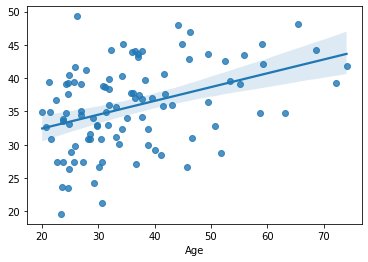

In [27]:
from sklearn.decomposition import PCA

features = df.columns[2:]

pca = PCA(n_components=5)
pca_features = pca.fit_transform(df[features])

# same as in the previous example except:                                       VVV here VVV
cv_predictions = cross_val_predict(estimator=LinearRegression(), y=df[target], X=pca_features, cv=KFold(5))
sns.regplot(x=df[target], y=cv_predictions)
print('MAE = ', mean_absolute_error(y_true=df[target], y_pred=cv_predictions), 'years')

MAE =  8.190707243962333 years


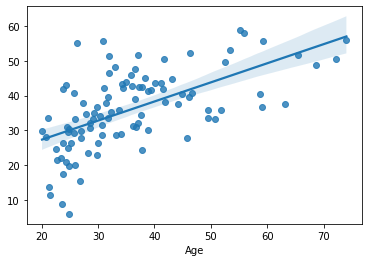

In [26]:
from sklearn.cross_decomposition import PLSRegression

# same as in the previous example except:            VVV here VVV
cv_predictions = cross_val_predict(estimator=PLSRegression(n_components=5), y=df[target], X=df[features], cv=KFold(5))
sns.regplot(x=df[target], y=cv_predictions)
print('MAE = ', mean_absolute_error(y_true=df[target], y_pred=cv_predictions), 'years')

## Regularized models: Ridge and LASSO

MAE =  8.00562203685471 years


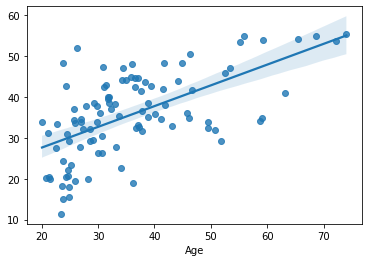

In [68]:
from sklearn.linear_model import Ridge

features = df.columns[2:]

# Changed:                                       VVV here VVV
cv_predictions = cross_val_predict(estimator=Ridge(alpha=10000000), y=df[target], X=df[features], cv=KFold(5))
sns.regplot(x=df[target], y=cv_predictions)
print('MAE = ', mean_absolute_error(y_true=df[target], y_pred=cv_predictions), 'years')

MAE =  8.028189984232535 years


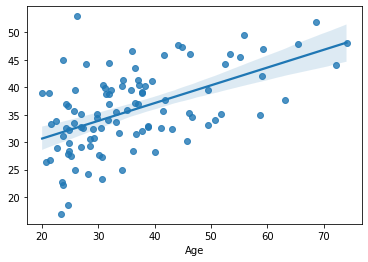

In [69]:
from sklearn.linear_model import Lasso

features = df.columns[2:]

# Changed:                                     VVV here VVV
cv_predictions = cross_val_predict(estimator=Lasso(alpha=1000), y=df[target], X=df[features], cv=KFold(5))
sns.regplot(x=df[target], y=cv_predictions)
print('MAE = ', mean_absolute_error(y_true=df[target], y_pred=cv_predictions), 'years')